In [1]:
!pip install -q qiskit[visualization]==1.0.2
!pip install -q qiskit_aer
!pip install -q qiskit_ibm_runtime
!pip install -q matplotlib
!pip install -q pylatexenc
!pip install -q prototype-zne
!pip install -q git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.9/323.9 kB 25.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━

### Reference : https://github.com/qiskit-community/ibm-quantum-challenge-2024/blob/main/content/lab_1/lab-1.ipynb

In [2]:
%set_env QXToken=16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b

env: QXToken=16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b


In [3]:
# imports
import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

In [4]:

# Setup the grader
from qc_grader.challenges.iqc_2024 import (
    grade_lab1_ex1,
    grade_lab1_ex2,
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6,
    grade_lab1_ex7,
)

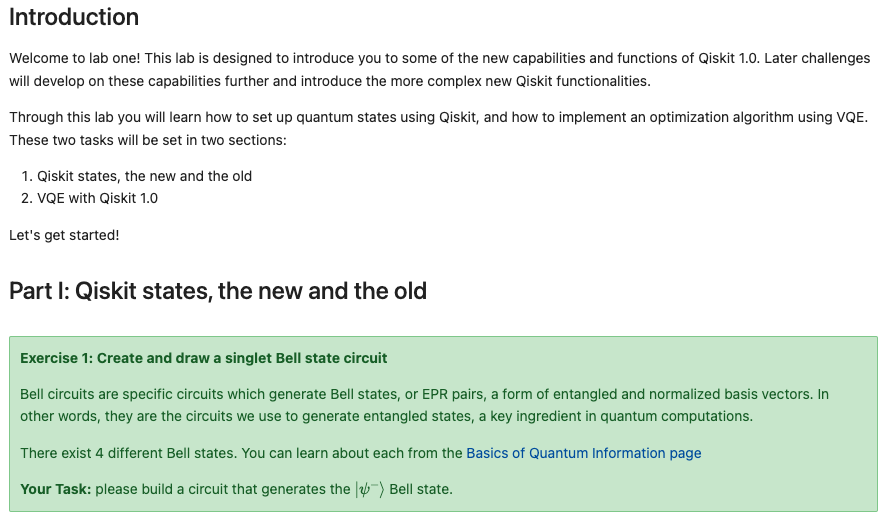

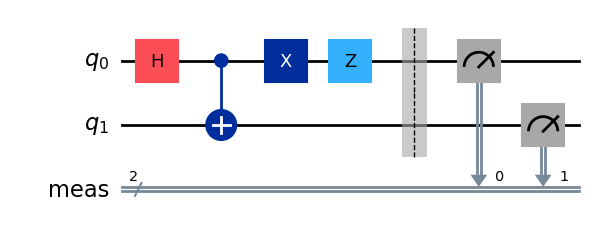

In [7]:
# Build a circuit to form a psi-minus Bell state
# Apply gates to the provided QuantumCircuit, qc
# Hint: The
# Bell state uses a single Z gate, and a single X gate, both of which occur after the CNOT.
qc = QuantumCircuit(2)

### Write your code below here ###

qc.h(0)
qc.cx(0,1)

# Apply an X gate on the first qubit
qc.x(0)

# Apply a Z gate on the first qubit
qc.z(0)

### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

In [8]:
# Submit your answer using following code

grade_lab1_ex1(qc) # Expected result type: QuantumCircuit

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


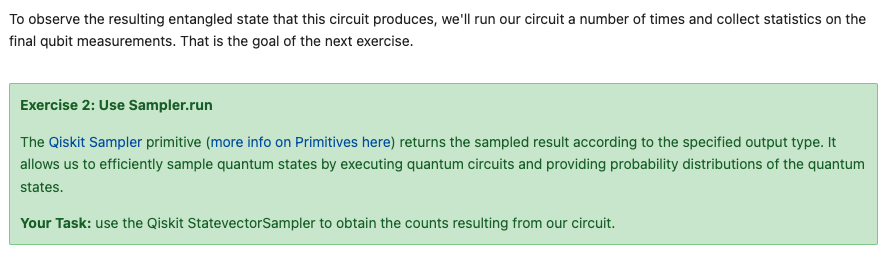

In [10]:
qc.measure_all()

### Write your code below here ###

sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=256)


### Don't change any code past this line ###

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'01': 138, '10': 118}


In [11]:
# Submit your answer using following code

grade_lab1_ex2(job_sampler) # Expected result type: PrimitiveJob

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


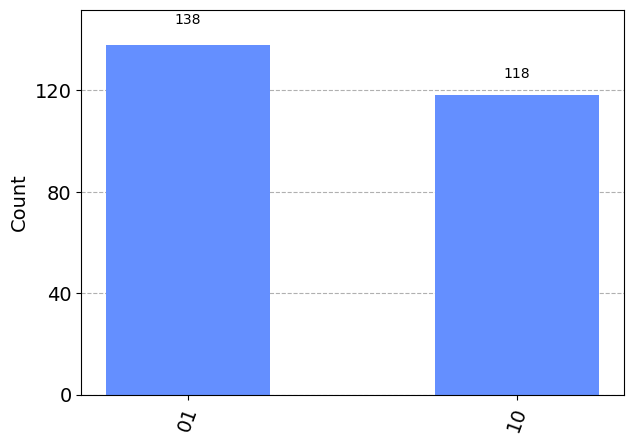

In [12]:
plot_histogram(counts_sampler)

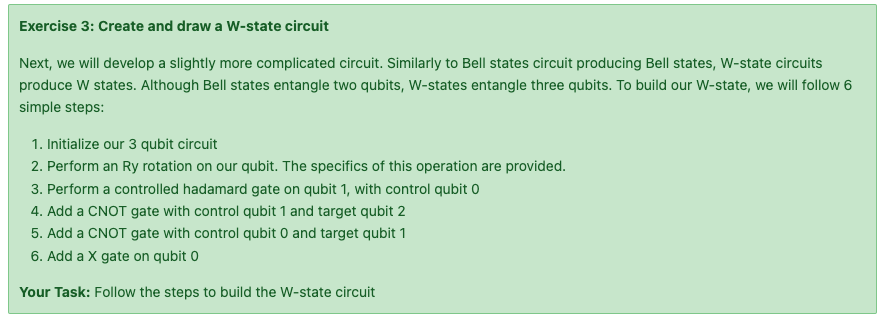

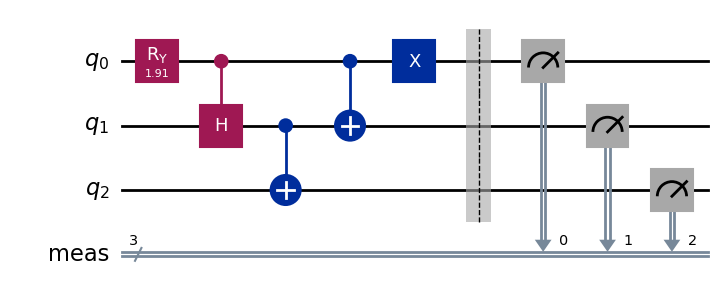

In [13]:
# Step 1
qc = QuantumCircuit(3)

# Step 2 (provided)
qc.ry(1.91063324, 0)

# Add steps 3-6 below

qc.ch(0,1)
qc.cx(1,2)
qc.cx(0,1)
qc.x(0)
### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

In [14]:
# Submit your answer using following code

grade_lab1_ex3(qc) # Expected result type: # Expected result type: QuantumCircuit

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [15]:
sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'010': 3317, '001': 3324, '100': 3359}


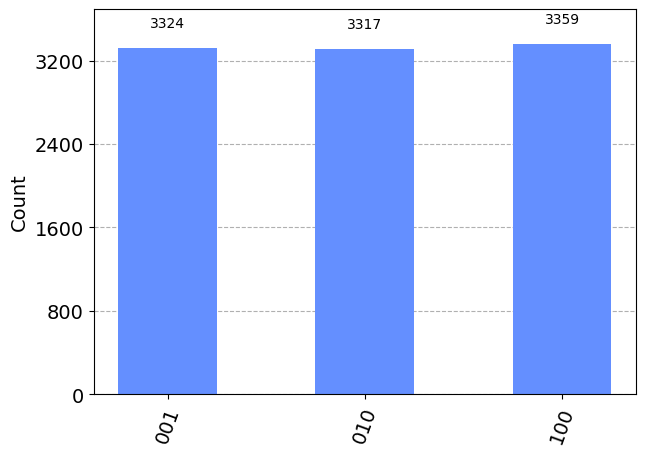

In [17]:
plot_histogram(counts_sampler)
# We observe our total counts distributed in three similarly sized bins in three states,
# which are the three desired states for the successful creation of a W-state. Good work!

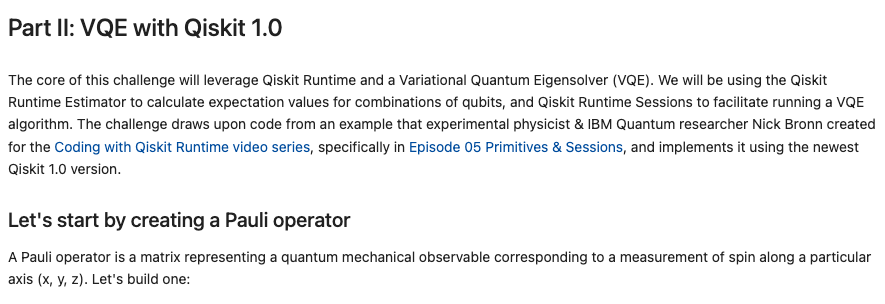

In [18]:
pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ'])
print(pauli_op.to_matrix())

[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -3.+0.j]]


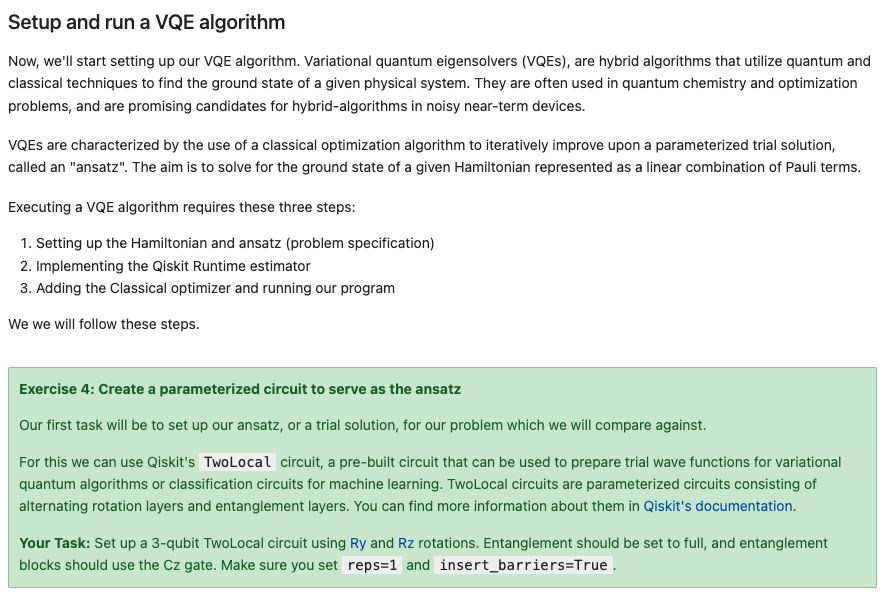

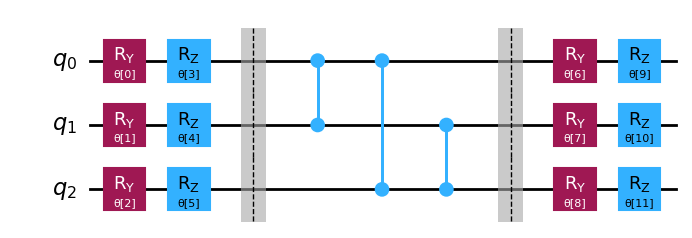

In [19]:
# Number of qubits
num_qubits = 3

# Define rotation blocks (Ry and Rz)
rotation_blocks = ['ry', 'rz']

# Define entanglement blocks (Cz)
entanglement_blocks = 'cz'

# Define entanglement type
entanglement = 'full'

# Create the ansatz with the specified parameters
ansatz = TwoLocal(num_qubits=num_qubits,
                  rotation_blocks=rotation_blocks,
                  entanglement_blocks=entanglement_blocks,
                  entanglement=entanglement,
                  reps=1,
                  insert_barriers=True)

# Visualize the circuit
ansatz.decompose().draw('mpl')


In [20]:
# Submit your answer using following code

grade_lab1_ex4(num_qubits, rotation_blocks, entanglement_blocks, entanglement) # Expected result type: int, List[str], str, str

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [21]:
num_params = ansatz.num_parameters
num_params

12

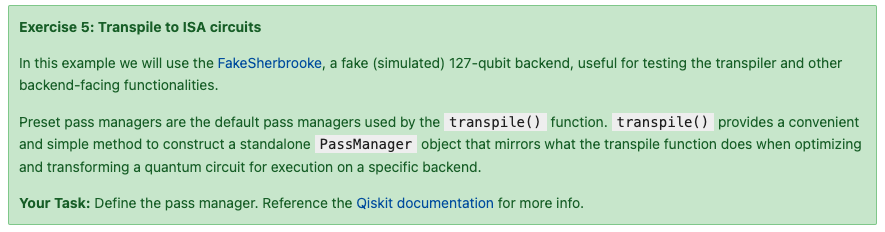

In [30]:
backend_answer = FakeSherbrooke()
optimization_level_answer = 2
pm = generate_preset_pass_manager(backend=backend_answer,optimization_level=optimization_level_answer)
isa_circuit = pm.run(ansatz)

In [31]:
# Submit your answer using following code

grade_lab1_ex5(isa_circuit) # Expected result type: QuantumCircuit

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


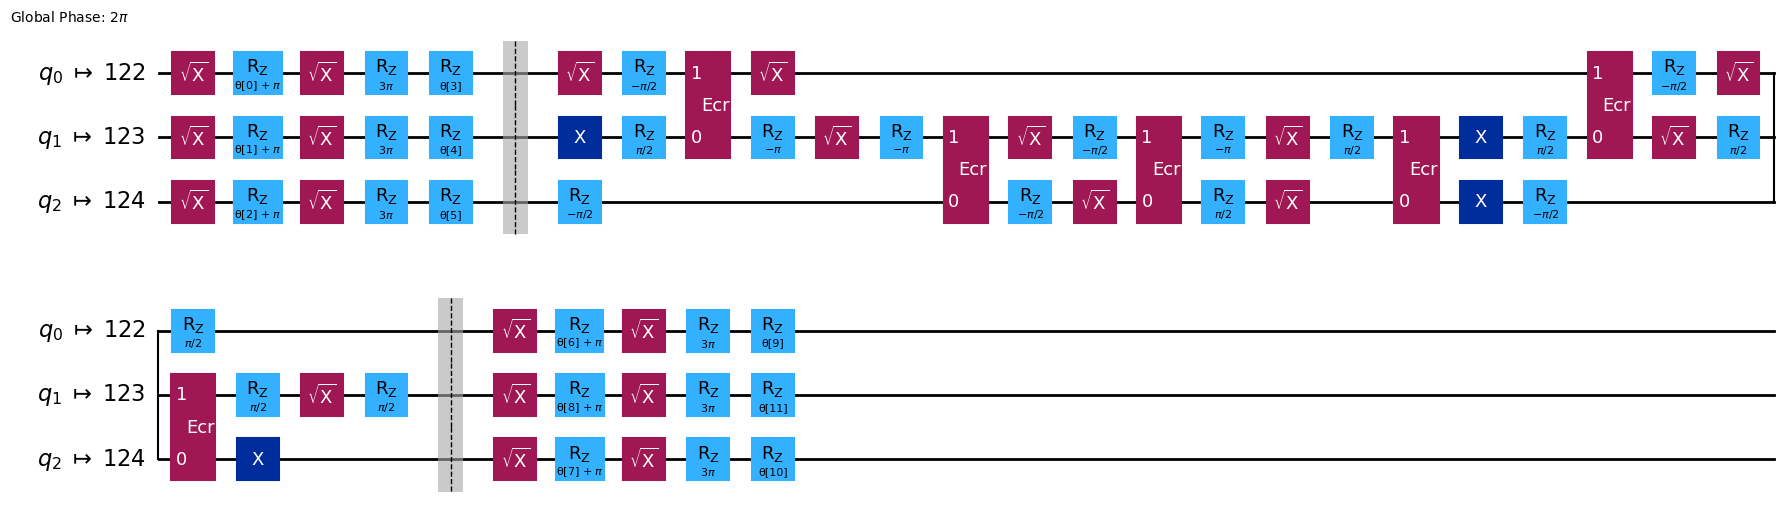

In [32]:
isa_circuit.draw('mpl', idle_wires=False,)

In [33]:
# Define our Hamiltonian
hamiltonian_isa = pauli_op.apply_layout(layout=isa_circuit.layout)

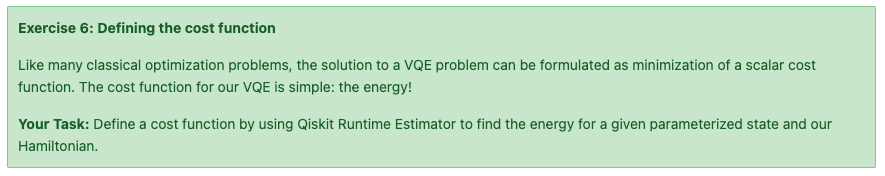

In [35]:
def cost_func(params, ansatz, hamiltonian, estimator, callback_dict):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = params
    callback_dict["cost_history"].append(energy)


### Don't change any code past this line ###
    print(energy)
    return energy, result

In [36]:
# Submit your answer using following code

grade_lab1_ex6(cost_func) # Expected result type: Callable

[0.65185547]
Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Callback functions are a standard way for users to obtain additional information about the status of an iterative algorithm (such as VQE). However, it is possible to do much more than this. Here, we use a mutable object (dictionary), to store resulting vector at each iteration of our algorithm, in case we need to restart the routine due to failure or return the another iteration number.


In [37]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

## Using the Classical Optimizer
We can now use a classical optimizer of our choice to minimize the cost function. In real quantum hardware, the choice of optimizer is important, as not all optimizers handle noisy cost function landscapes equally well. Here, we can use SciPy routines.

To begin the routine, we specify a random initial set of parameters:

In [38]:
x0 = 2 * np.pi * np.random.random(num_params)
x0

array([3.62130932, 1.22235115, 3.42295979, 0.58763166, 2.33874352,
       4.7552444 , 3.78828977, 0.17190884, 3.25748918, 2.5852578 ,
       4.37287169, 4.47225872])

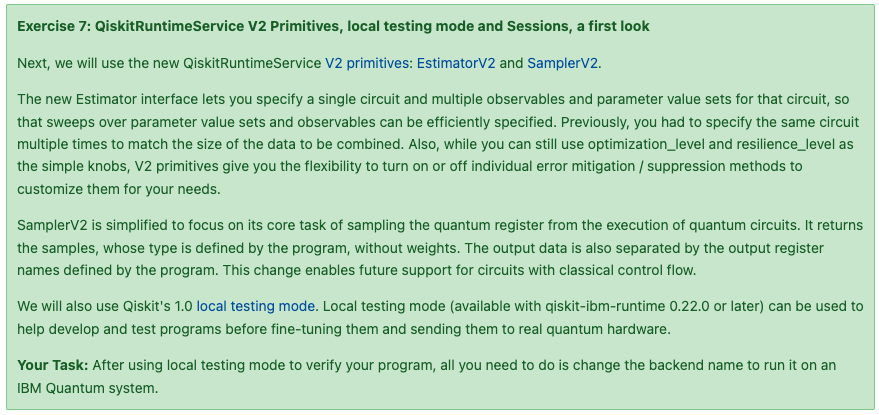

In [43]:
### Select a Backend
## Use FakeSherbrooke to simulate with noise that matches closer to the real experiment. This will run slower.
## Use AerSimulator to simulate without noise to quickly iterate. This will run faster.

# backend = FakeSherbrooke()
backend = AerSimulator()

# ### Don't change any code past this line ###

# Here we have updated the cost function to return only the energy to be compatible with recent scipy versions (>=1.10)
def cost_func_2(*args, **kwargs):
    energy, result = cost_func(*args, **kwargs)
    return energy

with Session(backend=backend) as session:
    estimator = Estimator(session=session)

    res = minimize(
        cost_func_2,
        x0,
        args=(isa_circuit, hamiltonian_isa, estimator, callback_dict),
        method="cobyla",
        options={'maxiter': 100})

2.14990234375
1.537109375
0.10693359375
-0.33642578125
-0.21337890625
-0.30419921875
-0.345703125
-0.4599609375
-0.08935546875
-0.6337890625
-0.6552734375
-0.66845703125
-0.63525390625
-0.7490234375
-1.18408203125
-1.638671875
-1.4892578125
-1.60693359375
-1.75634765625
-1.8916015625
-1.4296875
-1.3955078125
-1.6044921875
-1.86767578125
-1.8779296875
-1.91552734375
-1.76416015625
-1.89208984375
-2.03369140625
-1.98046875
-2.0263671875
-2.39013671875
-2.5048828125
-2.5478515625
-2.67236328125
-2.763671875
-2.62109375
-2.80908203125
-2.7021484375
-2.591796875
-2.8203125
-2.85205078125
-2.8515625
-2.91259765625
-2.916015625
-2.84912109375
-2.90380859375
-2.7666015625
-2.8876953125
-2.8359375
-2.8818359375
-2.85302734375
-2.96044921875
-2.9384765625
-2.95361328125
-2.96337890625
-2.974609375
-2.93359375
-2.95703125
-2.95947265625
-2.970703125
-2.92626953125
-2.97216796875
-2.96923828125
-2.9765625
-2.97314453125
-2.97509765625
-2.97314453125
-2.97998046875
-2.9765625
-2.9638671875
-2.98242

In [44]:
# Submit your answer using following code

grade_lab1_ex7(res) # Expected result type: OptimizeResult

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


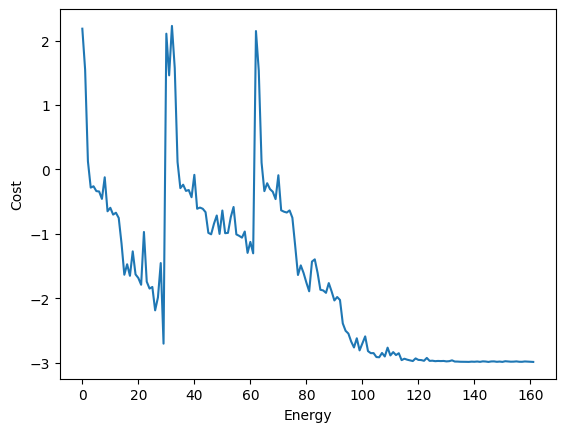

In [45]:
fig, ax = plt.subplots()
plt.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
plt.xlabel("Energy")
plt.ylabel("Cost")
plt.draw()